In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [13]:
!curl -O  https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/perrin-freres-monthly-champagne-.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6733  100  6733    0     0  11031      0 --:--:-- --:--:-- --:--:-- 11092


In [17]:
!type perrin-freres-monthly-champagne-.csv | more  # To look at the data before converting to df

{"payload":{"allShortcutsEnabled":false,"fileTree":{"":{"items":[{"name":"README.md","path":"README.md","contentType":"file"},{"name":"Untitled.ipynb","path":"Untitled.ipynb","contentType":"file"},{"name":"perrin-freres-monthly-champagne-.csv","path":"perrin-freres-monthly-champagne-.csv","contentType":"file"}],"totalCount":3}},"fileTreeProcessingTime":2.234085,"foldersToFetch":[],"reducedMotionEnabled":null,"repo":{"id":248425834,"defaultBranch":"master","name":"ARIMA-And-Seasonal-ARIMA","ownerLogin":"krishnaik06","currentUserCanPush":false,"isFork":false,"isEmpty":false,"createdAt":"2020-03-19T06:18:14.000Z","ownerAvatar":"https://avatars.githubusercontent.com/u/20041231?v=4","public":true,"private":false,"isOrgOwned":false},"symbolsExpanded":false,"treeExpanded":true,"refInfo":{"name":"master","listCacheKey":"v0:1584598696.0","canEdit":false,"refType":"branch","currentOid":"53acb7feffcc9d42fc3bf02c8925e68052bdca99"},"path":"perrin-freres-monthly-champagne-.csv","currentUser":null,"b

In [35]:
import pandas as pd
import json

# Step 1: Read the file to get its content
with open('perrin-freres-monthly-champagne-.csv', 'r') as file:
    data = file.read()

# Step 2: Parse the string as a JSON
parsed_json = json.loads(data)

# Step 3: Extract the CSV data
csv_data = parsed_json['payload']['blob']['csv']

# Step 4: Convert the CSV data to a pandas DataFrame
df = pd.DataFrame(csv_data[1:], columns=csv_data[0])
df.columns=['Month','Sales']
df.set_index('Month',inplace=True)
df['Sales']=df['Sales'].apply(pd.to_numeric,errors='coerce')
df.index.freq='MS'
df.drop([df.index[-1],df.index[-2]],inplace=True)
df


,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0
...,...
1972-05,4618.0
1972-06,5312.0
1972-07,4298.0


<Axes: xlabel='Month'>

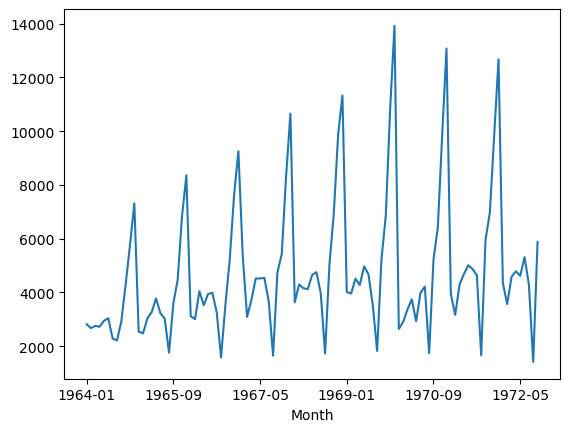

In [36]:
df['Sales'].plot()

In [49]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [50]:
# boolean series to index df rows
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [52]:
hw=ExponentialSmoothing(
train['Sales'],
initialization_method='legacy-heuristic',
trend='add',seasonal='add',seasonal_periods=12)
res_hw=hw.fit()


C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


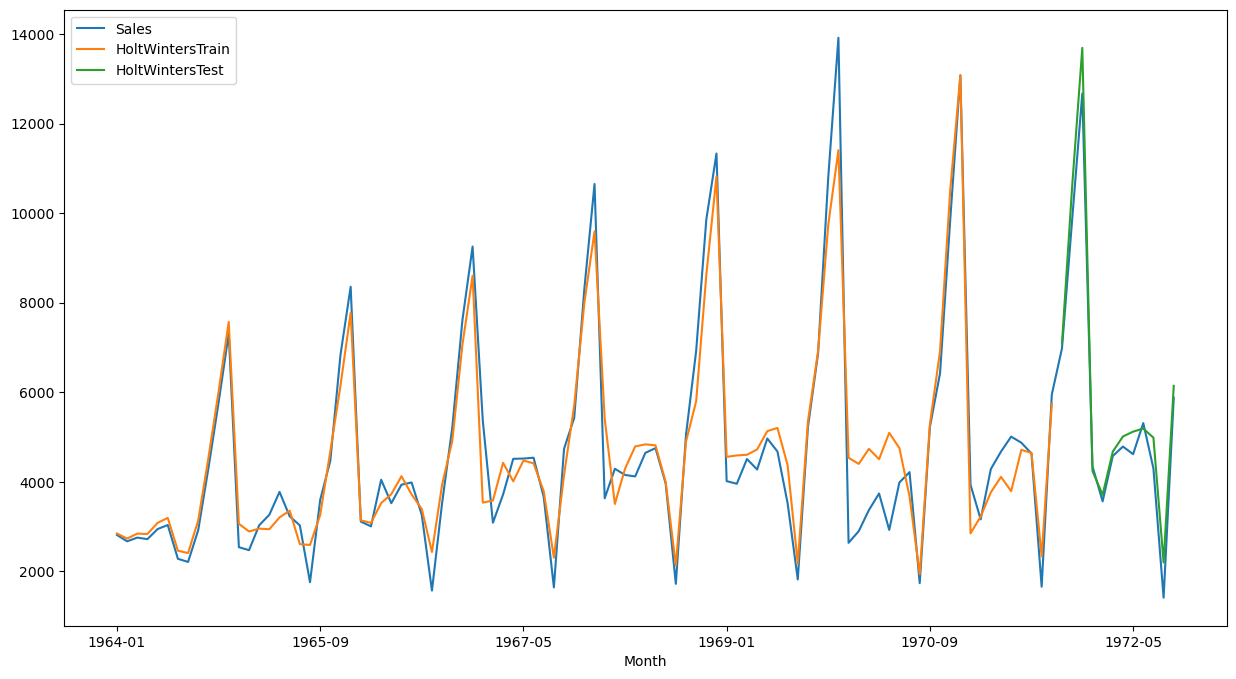

In [53]:
df.loc[train_idx,'HoltWintersTrain']=res_hw.fittedvalues
df.loc[test_idx,'HoltWintersTest']=res_hw.forecast(Ntest)
df[['Sales','HoltWintersTrain','HoltWintersTest']].plot(figsize=(15,8));

In [54]:
r2_score(train['Sales'],res_hw.fittedvalues)

0.9169984903500262

In [55]:
r2_score(test['Sales'],res_hw.forecast(Ntest))

0.9680340910154467